In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Handling missing values: Replacing zeros with NaN for select columns

In [6]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy['Glucose'] = diabetes_df_copy['Glucose'].replace(0,np.NaN)
diabetes_df_copy['BloodPressure'] = diabetes_df_copy['BloodPressure'].replace(0,np.NaN)
diabetes_df_copy['SkinThickness'] = diabetes_df_copy['SkinThickness'].replace(0,np.NaN)
diabetes_df_copy['Insulin'] = diabetes_df_copy['Insulin'].replace(0,np.NaN)
diabetes_df_copy['BMI'] = diabetes_df_copy['BMI'].replace(0,np.NaN)

Visualize the data distribution of selected features

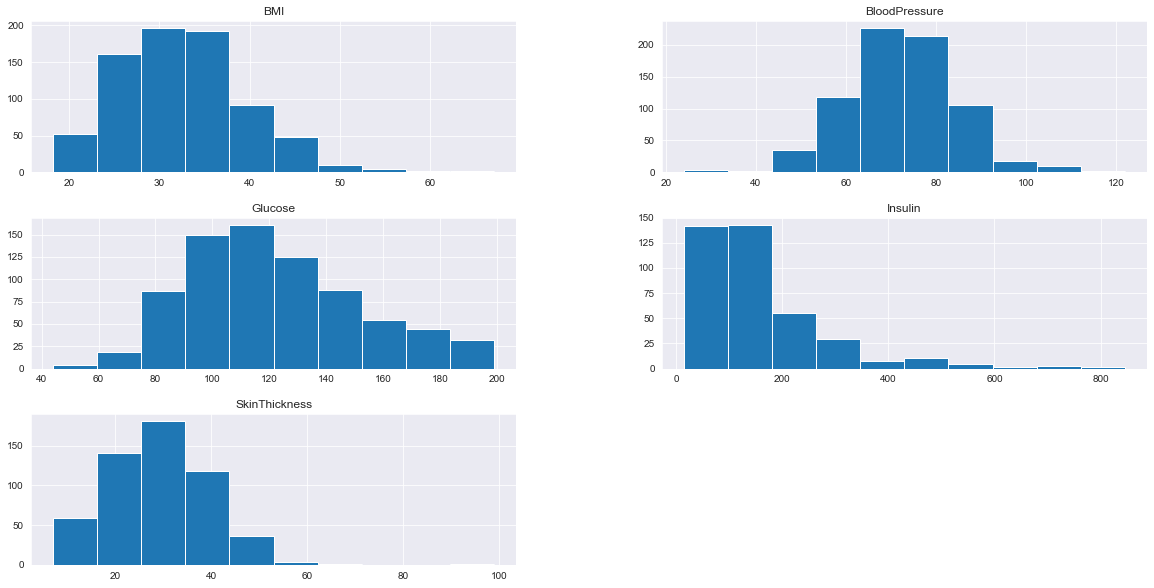

In [7]:
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize = (20,10))
plt.show()

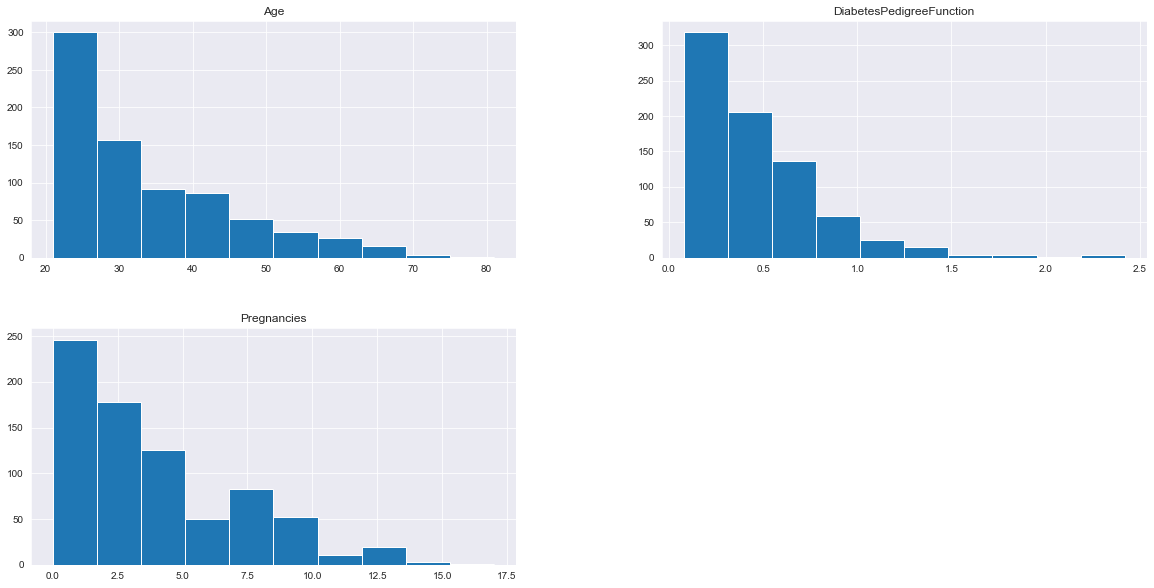

In [8]:
diabetes_df_copy[['Pregnancies', 'DiabetesPedigreeFunction', 'Age']].hist(figsize = (20,10))
plt.show()

Filling missing values with mean or median

In [9]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

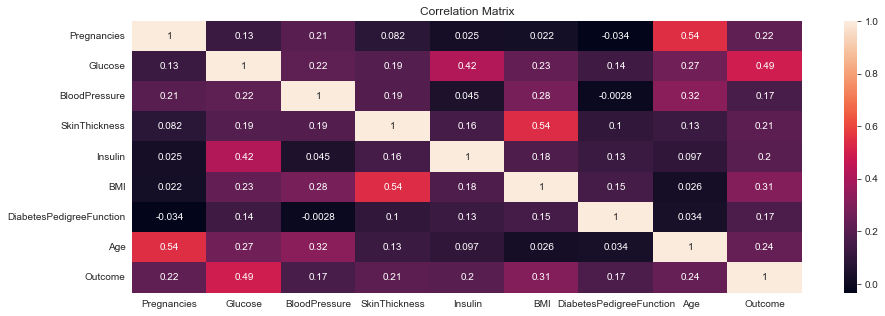

In [10]:
sns.heatmap(diabetes_df_copy.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

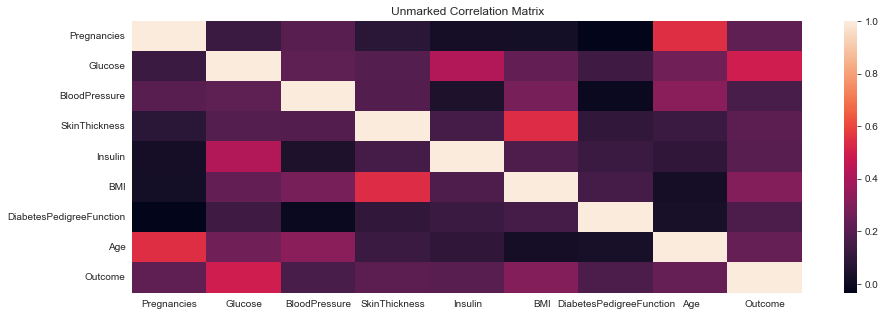

In [12]:
sns.heatmap(diabetes_df_copy.corr(), annot=False)
plt.title('Unmarked Correlation Matrix')
plt.show()

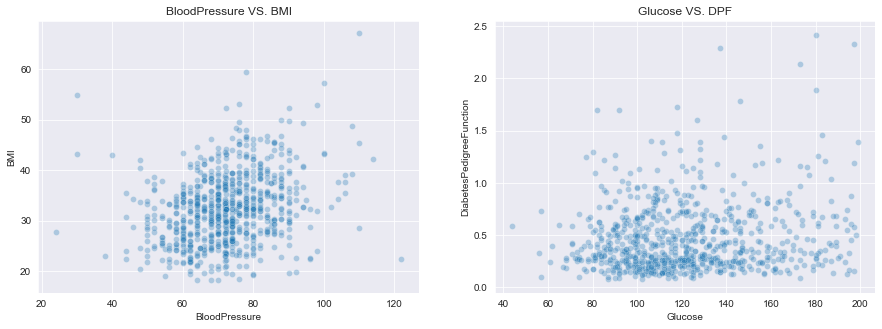

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x='BloodPressure', y='BMI', data=diabetes_df_copy, alpha=0.3, ax=axes[0])
axes[0].set_title('BloodPressure VS. BMI')

sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', data=diabetes_df_copy, alpha=0.3, ax=axes[1])
axes[1].set_title('Glucose VS. DPF')

plt.show()

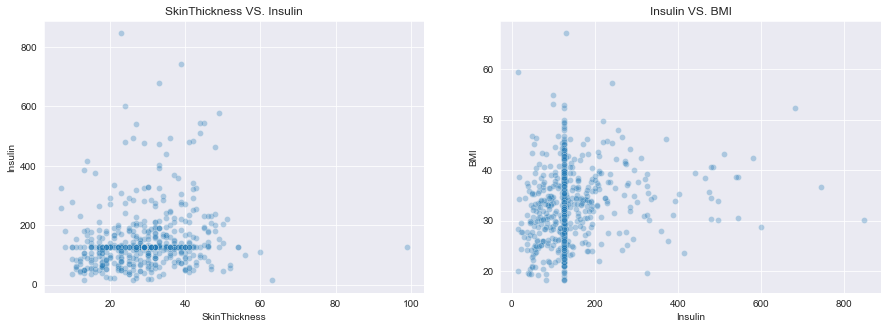

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x='SkinThickness', y='Insulin', data=diabetes_df_copy, alpha=0.3, ax=axes[0])
axes[0].set_title('SkinThickness VS. Insulin')

sns.scatterplot(x='Insulin', y='BMI', data=diabetes_df_copy, alpha=0.3, ax=axes[1])
axes[1].set_title('Insulin VS. BMI')

plt.show()

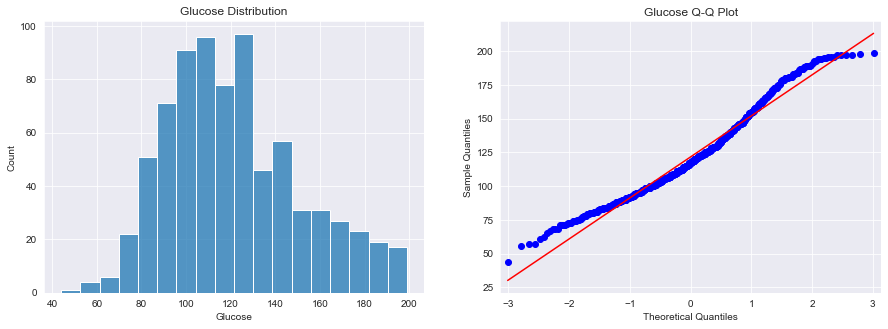

Shapiro-Wilk: 
w:0.969902515411377, p-value:1.7774986343921384e-11

Kolmogorov-Smirnov: 
d:0.969902515411377, p-value:0.0

Skewness of the data: 
0.531677628850459



In [15]:
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(diabetes_df_copy['Glucose'], ax=axes[0])
axes[0].set_title('Glucose Distribution')

sm.qqplot(diabetes_df_copy['Glucose'], line='s', ax=axes[1])
axes[1].set_title('Glucose Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['Glucose'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['Glucose'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['Glucose'])))

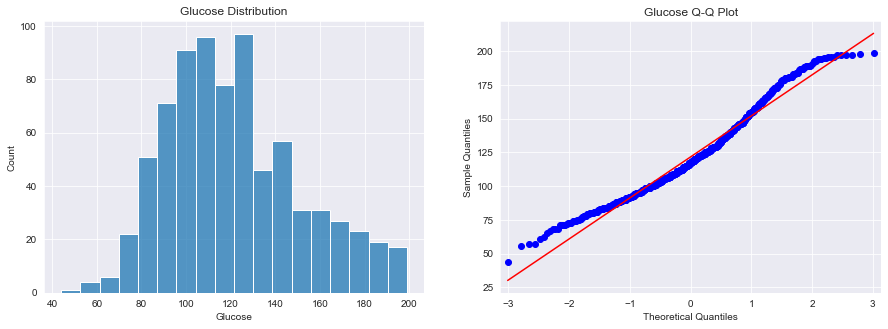

Shapiro-Wilk: 
w:0.969902515411377, p-value:1.7774986343921384e-11

Kolmogorov-Smirnov: 
d:0.969902515411377, p-value:0.0

Skewness of the data: 
0.531677628850459



In [16]:
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(diabetes_df_copy['Glucose'], ax=axes[0])
axes[0].set_title('Glucose Distribution')

sm.qqplot(diabetes_df_copy['Glucose'], line='s', ax=axes[1])
axes[1].set_title('Glucose Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['Glucose'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['Glucose'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['Glucose'])))

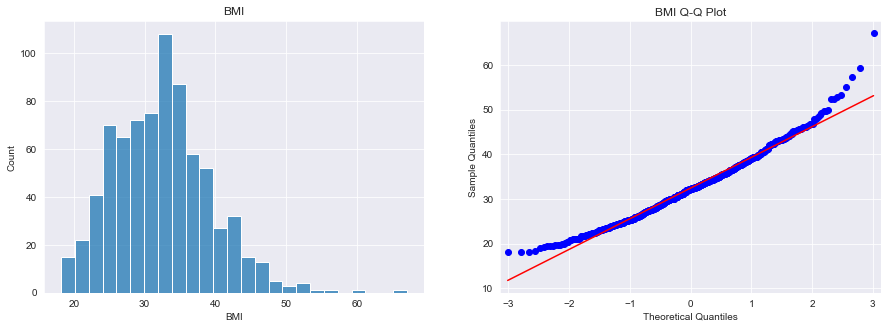

Shapiro-Wilk: 
w:0.979444146156311, p-value:6.441978950277871e-09

Kolmogorov-Smirnov: 
d:0.979444146156311, p-value:0.0

Skewness of the data: 
0.5980615087222572



In [17]:
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(diabetes_df_copy['BMI'], ax=axes[0])
axes[0].set_title('BMI')

sm.qqplot(diabetes_df_copy['BMI'], line='s', ax=axes[1])
axes[1].set_title('BMI Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['BMI'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['BMI'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['BMI'])))

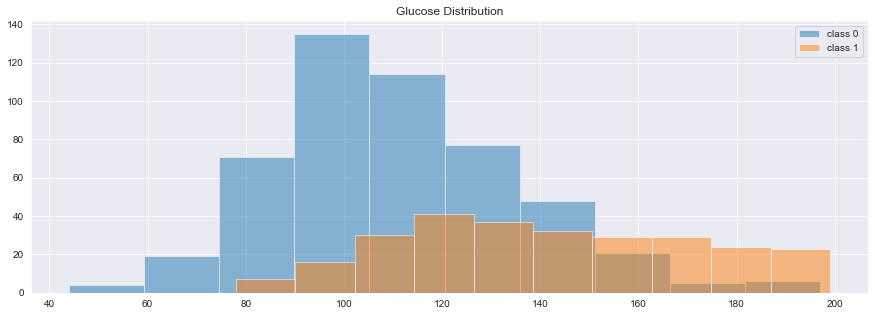

In [18]:
class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

plt.hist(x=class_zero['Glucose'], label='class 0', alpha=0.5)
plt.hist(x=class_one['Glucose'], label='class 1', alpha=0.5)
plt.legend()
plt.title('Glucose Distribution')

plt.show()

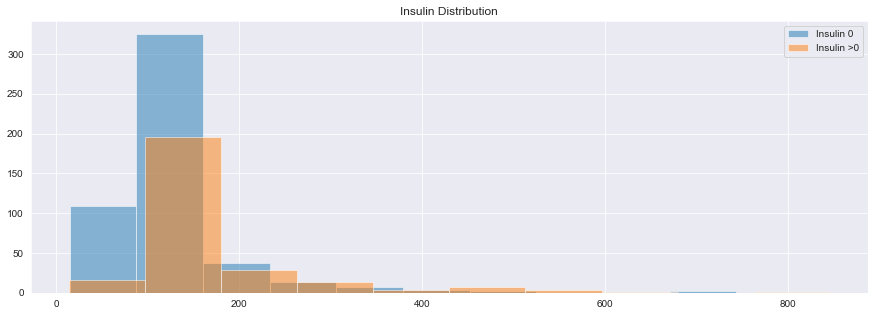

In [20]:
class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] > 0)]

plt.hist(x=class_zero['Insulin'], label='Insulin 0', alpha=0.5)
plt.hist(x=class_one['Insulin'], label='Insulin >0', alpha=0.5)
plt.legend()
plt.title('Insulin Distribution')

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Split the dataset into features (X) and target variable (y)
# all columns except 'Outcome'
X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


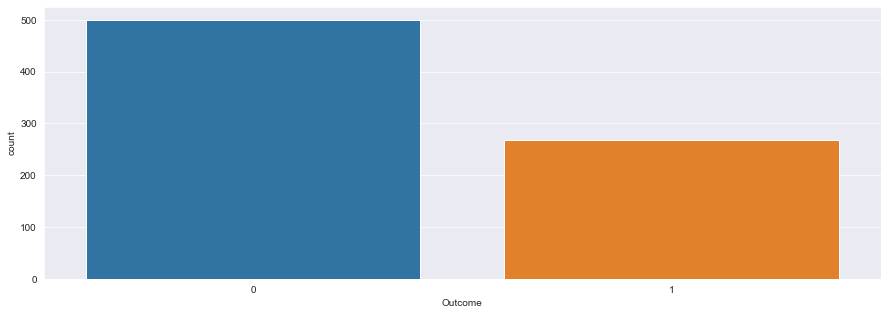

In [23]:
sns.countplot(x=diabetes_df_copy['Outcome'])
plt.show()

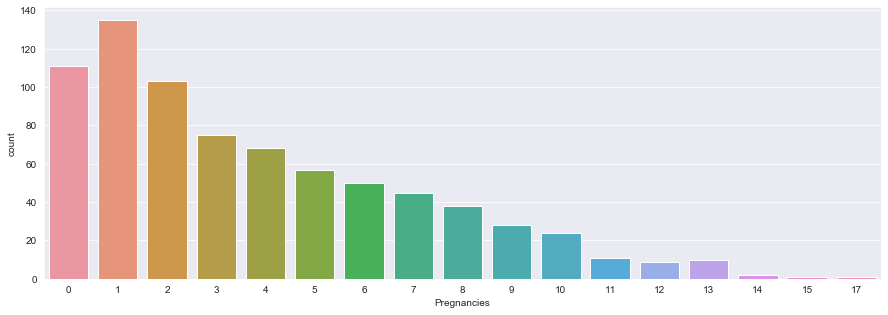

In [25]:
sns.countplot(x=diabetes_df_copy['Pregnancies'])
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1-14
for i in range(1,15):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

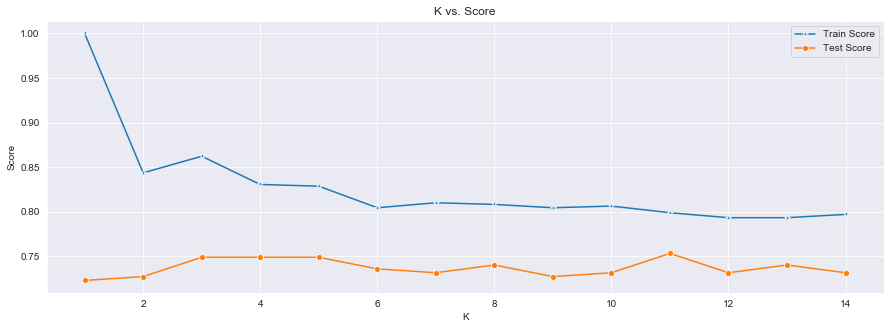

In [28]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize lists to store training and testing accuracies for different K values
test_scores = []
train_scores = []

# Loop through different K values to find the optimal number of neighbors
for i in range(1,20):
    
    knn = KNeighborsClassifier(i)
    
    knn.fit(X_train,y_train)
    
     
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

# Plot training and testing accuracies for different K values

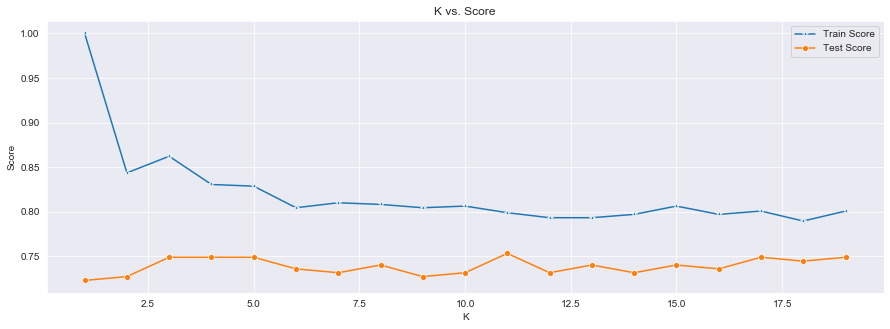

In [30]:
sns.lineplot(x=range(1,20), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,20), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [ ]:
# Select the optimal K (based on highest test accuracy)
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7532467532467533

In [32]:
knn = KNeighborsClassifier(18)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7445887445887446

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231

[[131  19]
 [ 40  41]]


In [34]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7532467532467533

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[[127  23]
 [ 34  47]]


The K-Nearest Neighbors (KNN) algorithm was applied to the diabetes dataset to classify patients as diabetic or non-diabetic. During preprocessing, several features, including `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`, contained zero values that were replaced with missing values (`NaN`). These missing values were then imputed using the mean or median, depending on the distribution of each feature. To prepare the data for the distance-based KNN algorithm, all features were scaled using `StandardScaler`, ensuring uniformity across feature ranges. Visualizations and correlation analysis revealed notable relationships among features like `BMI`, `Insulin`, and `Glucose`, which provided useful insights into the dataset and guided the modeling process.

To optimize the KNN algorithm, multiple values of \( K \), the number of neighbors, were tested, ranging from 1 to 20. As  K  increased, the training accuracy gradually decreased, reducing overfitting, while the testing accuracy initially increased and then stabilized. Based on these results, ( K = 11 ) was selected as the optimal value, achieving a test accuracy of 75.3%. The final model demonstrated balanced performance, with a weighted average F1-score of 0.75. For the non-diabetic class (`Outcome = 0`), the model achieved high precision, recall, and F1-score, indicating strong predictive ability. However, for the diabetic class (`Outcome = 1`), the model struggled, with lower precision and recall, highlighting a need for improvement in detecting diabetic cases.

A closer examination of the confusion matrix revealed that the model correctly predicted 127 non-diabetic cases and 47 diabetic cases. However, it also misclassified 34 diabetic cases as non-diabetic, a significant number that could have serious implications in real-world healthcare applications. This discrepancy may be attributed to class imbalance, as the dataset contains fewer diabetic samples. Addressing this issue through techniques like oversampling or undersampling could improve the model’s sensitivity to the diabetic class. Additionally, incorporating new features based on domain expertise, such as interactions between `Glucose` and `BMI`, or exploring alternative algorithms like Random Forests or Gradient Boosting, could further enhance performance.

Overall, the KNN algorithm provided a strong baseline for classification on this dataset. While it effectively predicted non-diabetic cases, the model’s lower recall for diabetic predictions underscores the importance of refining the approach. This analysis highlighted the potential of KNN in healthcare applications while emphasizing the need for targeted improvements to ensure its robustness and reliability in critical decision-making scenarios.
